__<h1 style="text-align: center;font-size: 3rem">Visualization Exploratory Data Analysis</h1><p style="text-align: center;font-size: 1.3rem">(Notebook II)</p>__

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from dotenv import load_dotenv

import itertools
import os

In [17]:
load_dotenv()
RANDOM_STATE = int(os.getenv("RANDOM_STATE", 0))
RAW_DATA_PATH = os.getenv("RAW_DATA_PATH", "../data/raw/creditcard.csv")

print(f"{RANDOM_STATE=}")

RANDOM_STATE=39103


In [18]:
plt.style.use("dark_background")

In [19]:
transactions: pd.DataFrame = pd.read_csv(RAW_DATA_PATH)

In [20]:
features = transactions.drop(columns=["Class"])
target = transactions["Class"]

In [21]:
standardized_features = pd.DataFrame(
    StandardScaler().fit_transform(features), columns=features.columns
)
standardized_features

Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.641931 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690   
284803  1.641952 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446   
284804  1.641974  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262   
284805  1.641974 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155   
284806  1.642058 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602   

              V7        V8        V9  ...       V20       V21       V22  \
0       0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854   
1      -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077   
2       0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358   
3       0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267   
4       0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011   
...          ...       ...       ...  ...       ...       ...       ...   
284802 -3.975628  6.116573  1.742559  ...  1.914365  0.290602  0.154146   
284803  0.019667  0.246886  0.532299  ...  0.077330  0.291625  1.273781   
284804 -0.239939  0.593140  0.393630  ...  0.001811  0.315913  0.796788   
284805 -0.554672  0.568631  0.356887  ...  0.165300  0.361112  1.102451   
284806  1.274769 -0.347176  0.442532  ...  0.496739  0.355411  0.886149   

             V23       V24       V25       V26       V27       V28    Amount  
0      -0.176911  0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964  
1       0.162201 -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475  
2       1.456320 -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686  
3      -0.304777 -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534  
4      -0.220123  0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403  
...          ...       ...       ...       ...       ...       ...       ...  
284802  1.624574 -0.841000  2.756320  0.518500  2.337901  2.495529 -0.350151  
284803  0.019958 -1.677920 -1.163726 -0.819647  0.169641 -0.162164 -0.254117  
284804 -0.060053  1.056944  0.509797 -0.181182  0.011037 -0.080467 -0.081839  
284805 -0.261503  0.203428 -1.091855  1.133635  0.269604  0.316687 -0.313249  
284806  0.603365  0.014526 -0.908631 -1.696853 -0.005984  0.041350  0.514355  

[284807 rows x 30 columns]

In [22]:
feat_names = transactions.drop(columns="Class").columns.to_numpy()
row_count = transactions.shape[0]
col_count = transactions.shape[1]
feat_count = col_count - 1

In [23]:
grouped_transactions = transactions.groupby("Class", group_keys=False)
sampled_transactions = grouped_transactions.sample(frac=0.3, random_state=RANDOM_STATE)
sampled_transactions

Time        V1        V2        V3        V4        V5        V6  \
80587    58557.0  1.201303 -0.309688 -0.314367  0.167426  1.540306  4.059730   
75567    56129.0  1.258661  0.134449  0.480409  0.636992 -0.623499 -1.031626   
283597  171719.0  1.975679  0.140976 -1.621742  1.414066  0.395443 -1.140981   
59605    48915.0  1.166954 -0.336931  0.669172  0.262487 -1.012905 -0.607989   
209655  137652.0  1.957695 -0.344577 -1.878571 -0.165990  1.059698  1.178907   
...          ...       ...       ...       ...       ...       ...       ...   
203324  134766.0 -0.079653  3.222010 -3.724201  6.037345  0.583395 -0.691346   
143728   85573.0 -1.756712  3.266574 -4.153388  3.924526 -1.753772 -1.005787   
6971      9064.0 -3.499108  0.258555 -4.489558  4.853894 -6.974522  3.628382   
58761    48533.0  1.243848  0.524526 -0.538884  1.209196  0.479538 -0.197429   
52521    45501.0  1.001992  0.047938 -0.349002  1.493958  0.186939  0.190966   

              V7        V8        V9  ...       V21       V22       V23  \
80587  -1.136824  1.090075  0.760974  ... -0.113604 -0.280918 -0.043147   
75567  -0.045767 -0.115336  0.285940  ... -0.275542 -0.874631  0.155580   
283597  0.677891 -0.424402  0.204968  ...  0.066069  0.356360 -0.025480   
59605  -0.408493  0.141610  0.691574  ... -0.277126 -0.815758  0.135104   
209655 -0.257957  0.392288  0.603761  ...  0.309177  1.011006  0.039362   
...          ...       ...       ...  ...       ...       ...       ...   
203324 -1.799885 -2.627781 -4.001338  ... -0.664694  1.138556 -0.350753   
143728 -4.313217  1.560712 -3.295674  ...  0.911427  0.053061 -0.367701   
6971    5.431271 -1.946734 -0.775680  ... -1.052368  0.204817 -2.119007   
58761   0.049166  0.037792  0.128119  ... -0.051660 -0.084089 -0.192846   
52521  -0.001112  0.147140  0.580415  ... -0.334417 -1.014315 -0.128427   

             V24       V25       V26       V27       V28   Amount  Class  
80587   1.001217  0.572592 -0.393931  0.074081  0.032089    12.99      0  
75567   0.336718  0.163354  0.099832 -0.039496  0.015646     1.98      0  
283597 -0.007418  0.446567 -0.492254 -0.020112 -0.057339    36.01      0  
59605   0.539264  0.059247  0.797968 -0.085175 -0.003465    19.95      0  
209655 -0.952126  0.080143 -0.022009  0.009714 -0.082587     3.50      0  
...          ...       ...       ...       ...       ...      ...    ...  
203324 -0.287467  0.808889  0.823962  0.668497  0.595610     1.00      1  
143728 -0.776338  0.292094  0.026000  1.062968  0.501148     1.00      1  
6971    0.170279 -0.393844  0.296367  1.985913 -0.900452  1809.68      1  
58761  -0.917392  0.681953 -0.194419  0.045917  0.040136     1.00      1  
52521  -0.946242  0.456090 -0.453206  0.046627  0.064698   105.99      1  

[85442 rows x 31 columns]

In [24]:
fraudulent_prop = float(
    (sampled_transactions["Class"] == 1).sum() / sampled_transactions.shape[0]
)
print(f"{fraudulent_prop:.3%}")

0.173%


In [ ]:
mask = transactions["Class"] == 1

class_0_df = transactions[~mask].drop(columns="Class")
class_1_df = transactions[mask].drop(columns="Class")

class_0_corr = class_0_df.corr()
class_1_corr = class_1_df.corr()


Text(0.5, 0.95, 'Fig 1: Correlation Matrices by Classes')

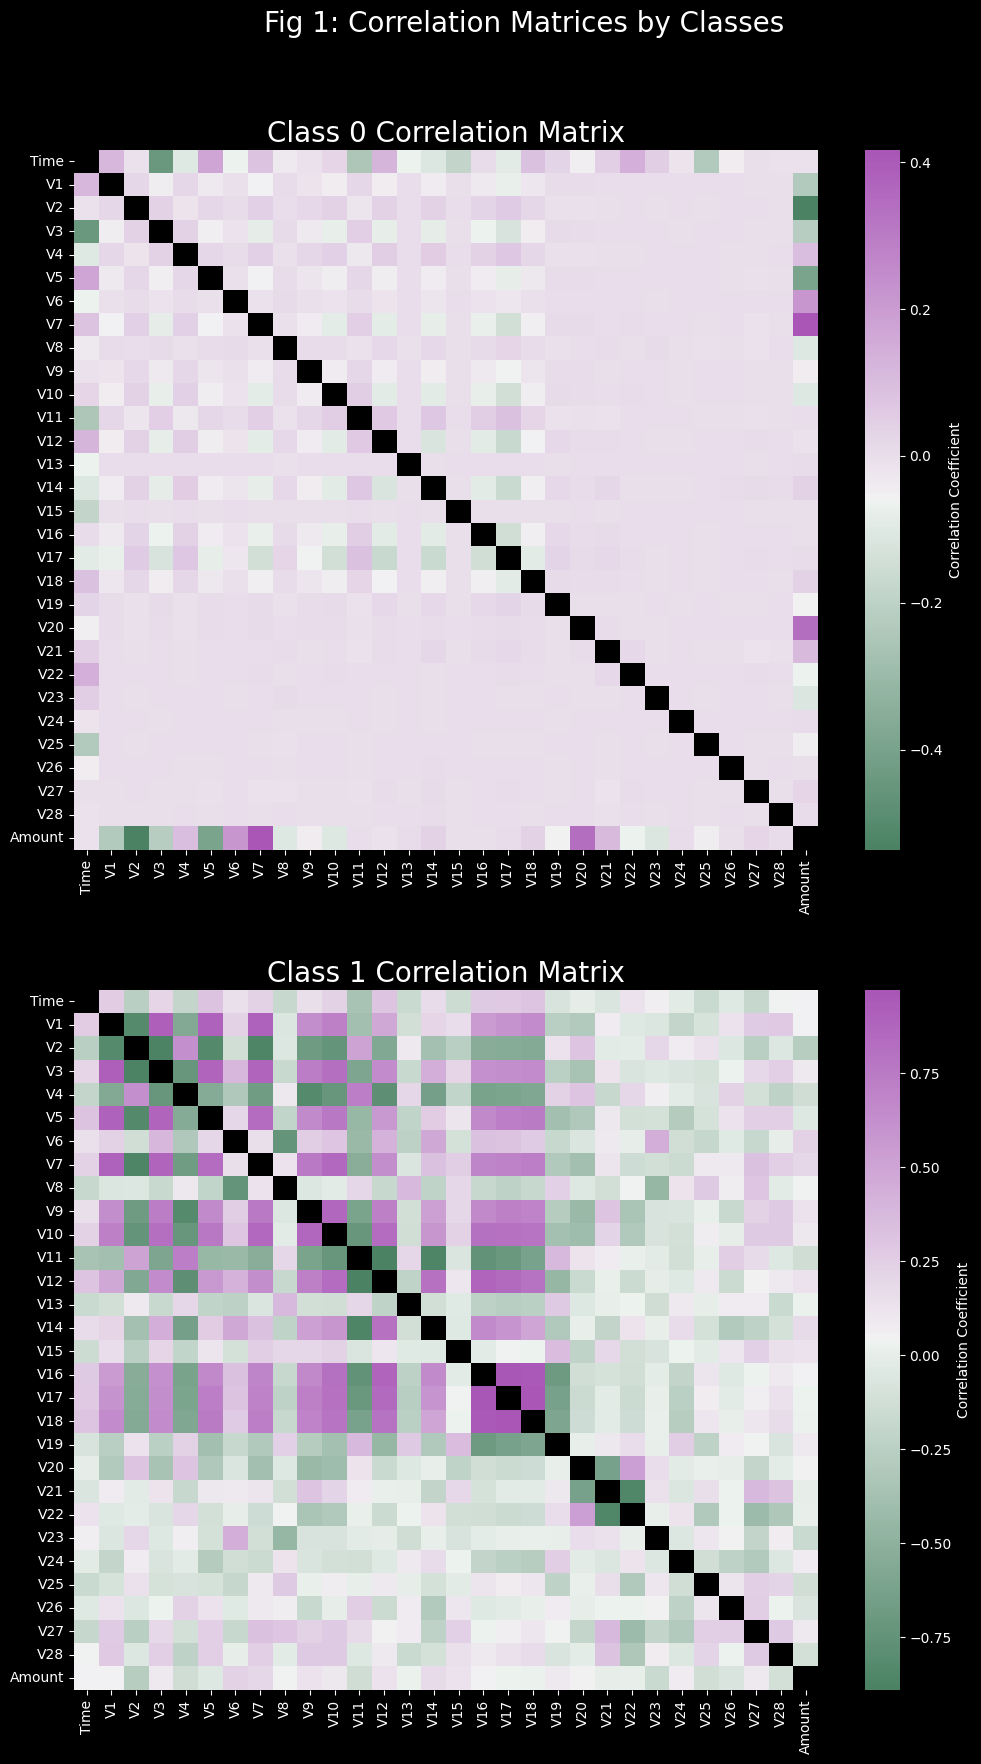

In [26]:
diag_mask = np.eye(feat_count, dtype=bool)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

sns.heatmap(
    class_0_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"},
    ax=axes[0],
)
axes[0].set_title("Class 0 Correlation Matrix", fontsize=20)

sns.heatmap(
    class_1_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"},
    ax=axes[1],
)
axes[1].set_title("Class 1 Correlation Matrix", fontsize=20)

fig.suptitle("Fig 1: Correlation Matrices by Classes", fontsize=20, y=0.95)

### Figure 1 Comments

Referring to _figure 1_ and the correlation matrix of _class 0_ entries (Genuine Transactions/Negative Class), there are not many strong correlation of variables aside from a few. There are strong positive correlations between the pair _V7_ and _Amount_ the pair _V20_ and _Amount_. There are strong negative correlations between the pairs _V2_ and _Amount_, _V3_ and _Time_, and _V5_ and _Amount_. In the _class 0_ correlation matrix, there is a section of variables in the top-left area of correlations that contained varied correlations from the primarily barely-negative correlations.

Referring to _figure 1_ again and looking at the correlation matrix of _class 1_ entries (Fraudulent Transactions/Positive Class), as there are fewer fraudulent transactions in the dataset, correlations are affected by sparse variables. The area of varied correlations mentioned in the _class 0_ matrix appears more intensely in the _class 1_ matrix, looking more closely the directions of correlations differ in some. 

<Axes: >

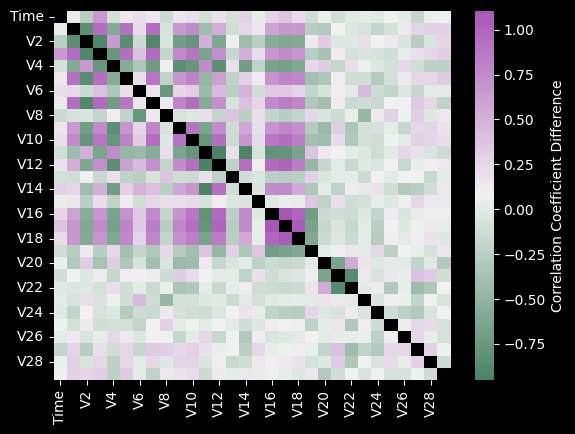

In [27]:
sns.heatmap(
    class_1_corr - class_0_corr,
    mask=diag_mask,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient Difference"},
)

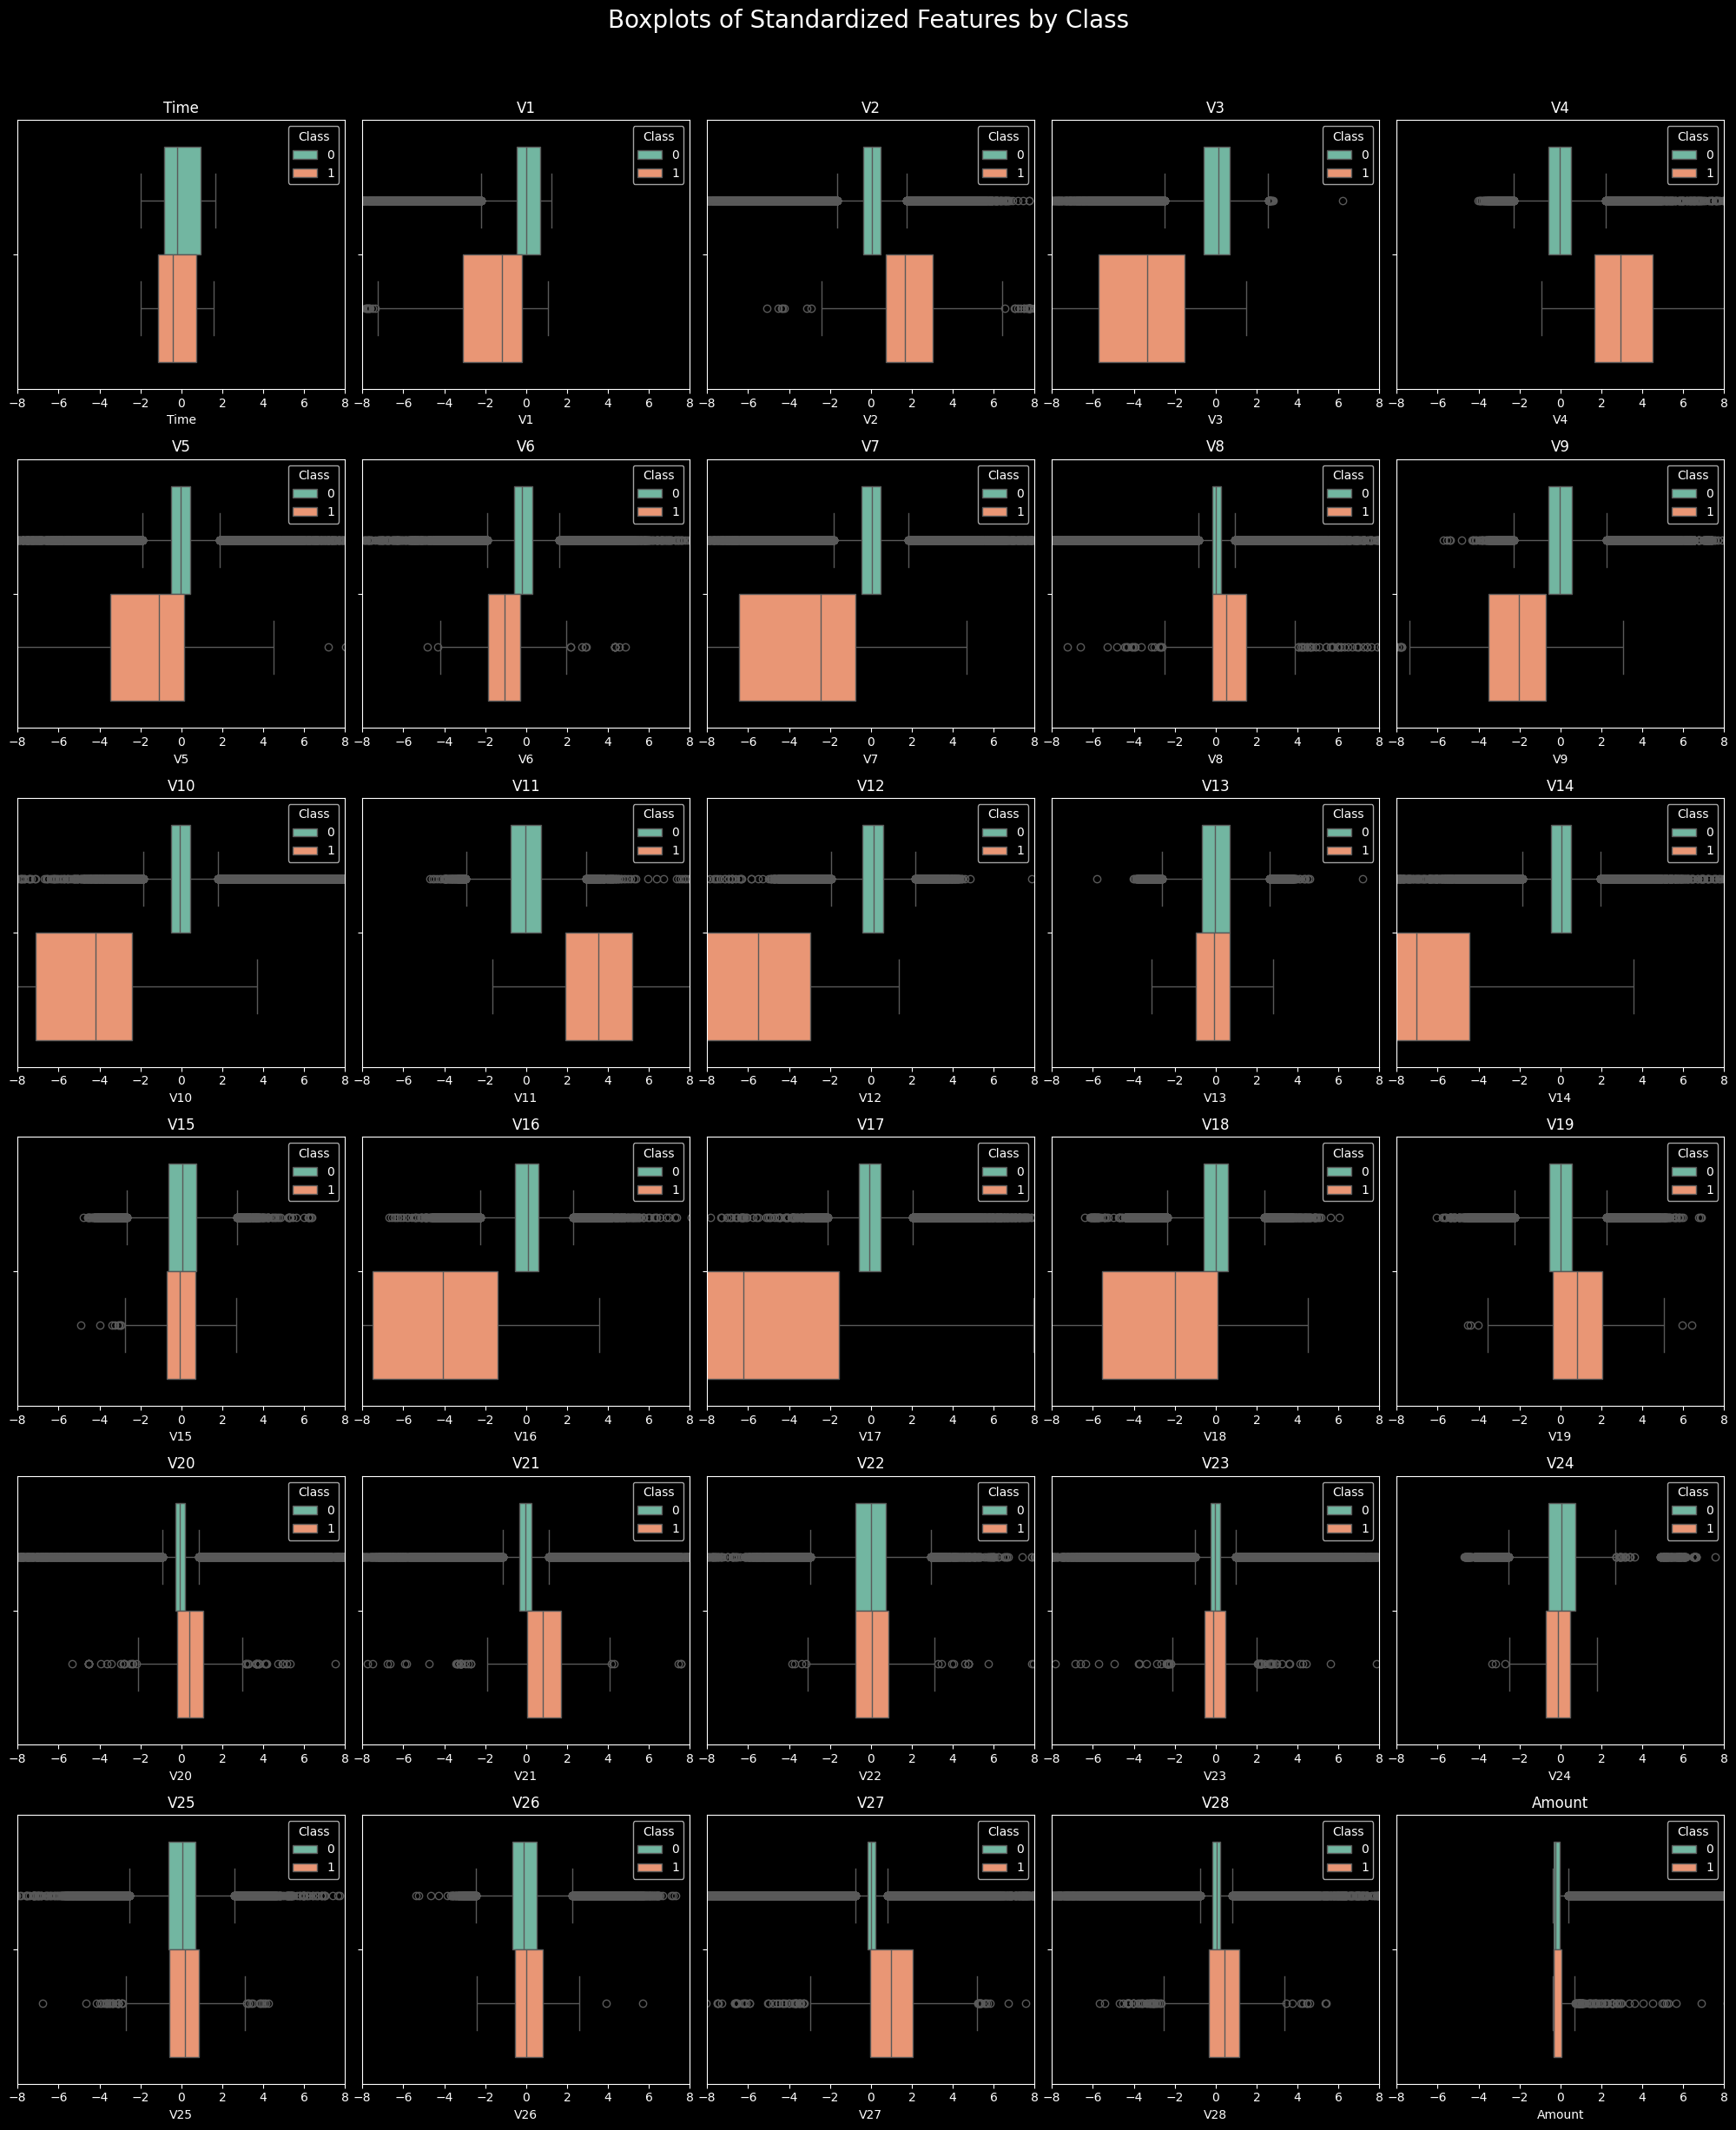

In [28]:
cols = 5
rows = int(np.round(len(feat_names) / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 24))

for i, col in enumerate(feat_names):
    ax = axes[i // cols, i % cols]
    sns.boxplot(
        standardized_features,
        x=col,
        palette="Set2",
        hue=transactions["Class"],
        ax=ax,
    )
    ax.set_title(col)
    ax.set_xlim(-8, 8)

fig.suptitle("Boxplots of Standardized Features by Class", fontsize=20, y=1.02)
fig.tight_layout()

In [29]:
(feats := transactions.columns.tolist()).remove("Class")

grouped_feats = tuple(itertools.batched(feats, 6))
grouped_feats

(('Time', 'V1', 'V2', 'V3', 'V4', 'V5'),
 ('V6', 'V7', 'V8', 'V9', 'V10', 'V11'),
 ('V12', 'V13', 'V14', 'V15', 'V16', 'V17'),
 ('V18', 'V19', 'V20', 'V21', 'V22', 'V23'),
 ('V24', 'V25', 'V26', 'V27', 'V28', 'Amount'))

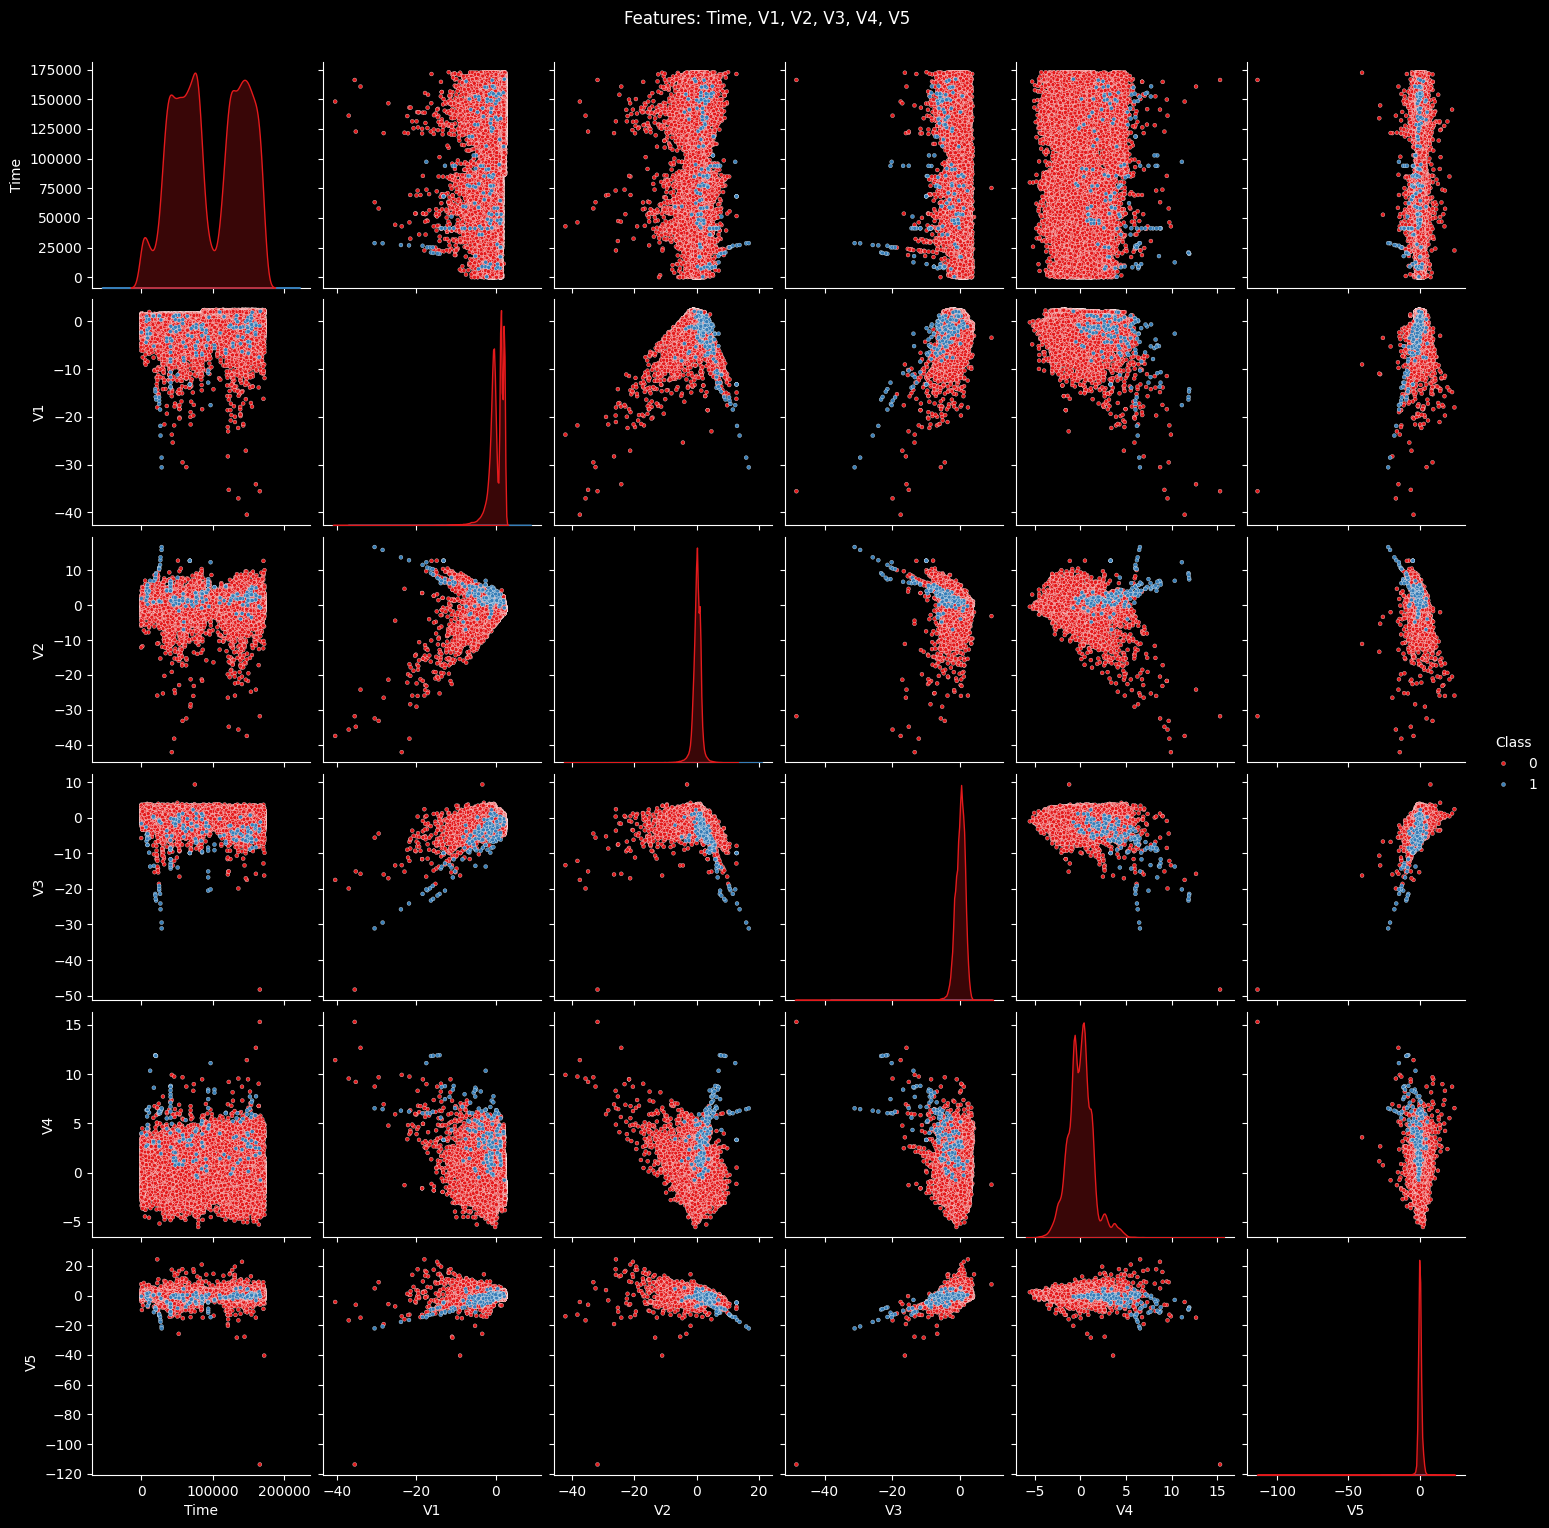

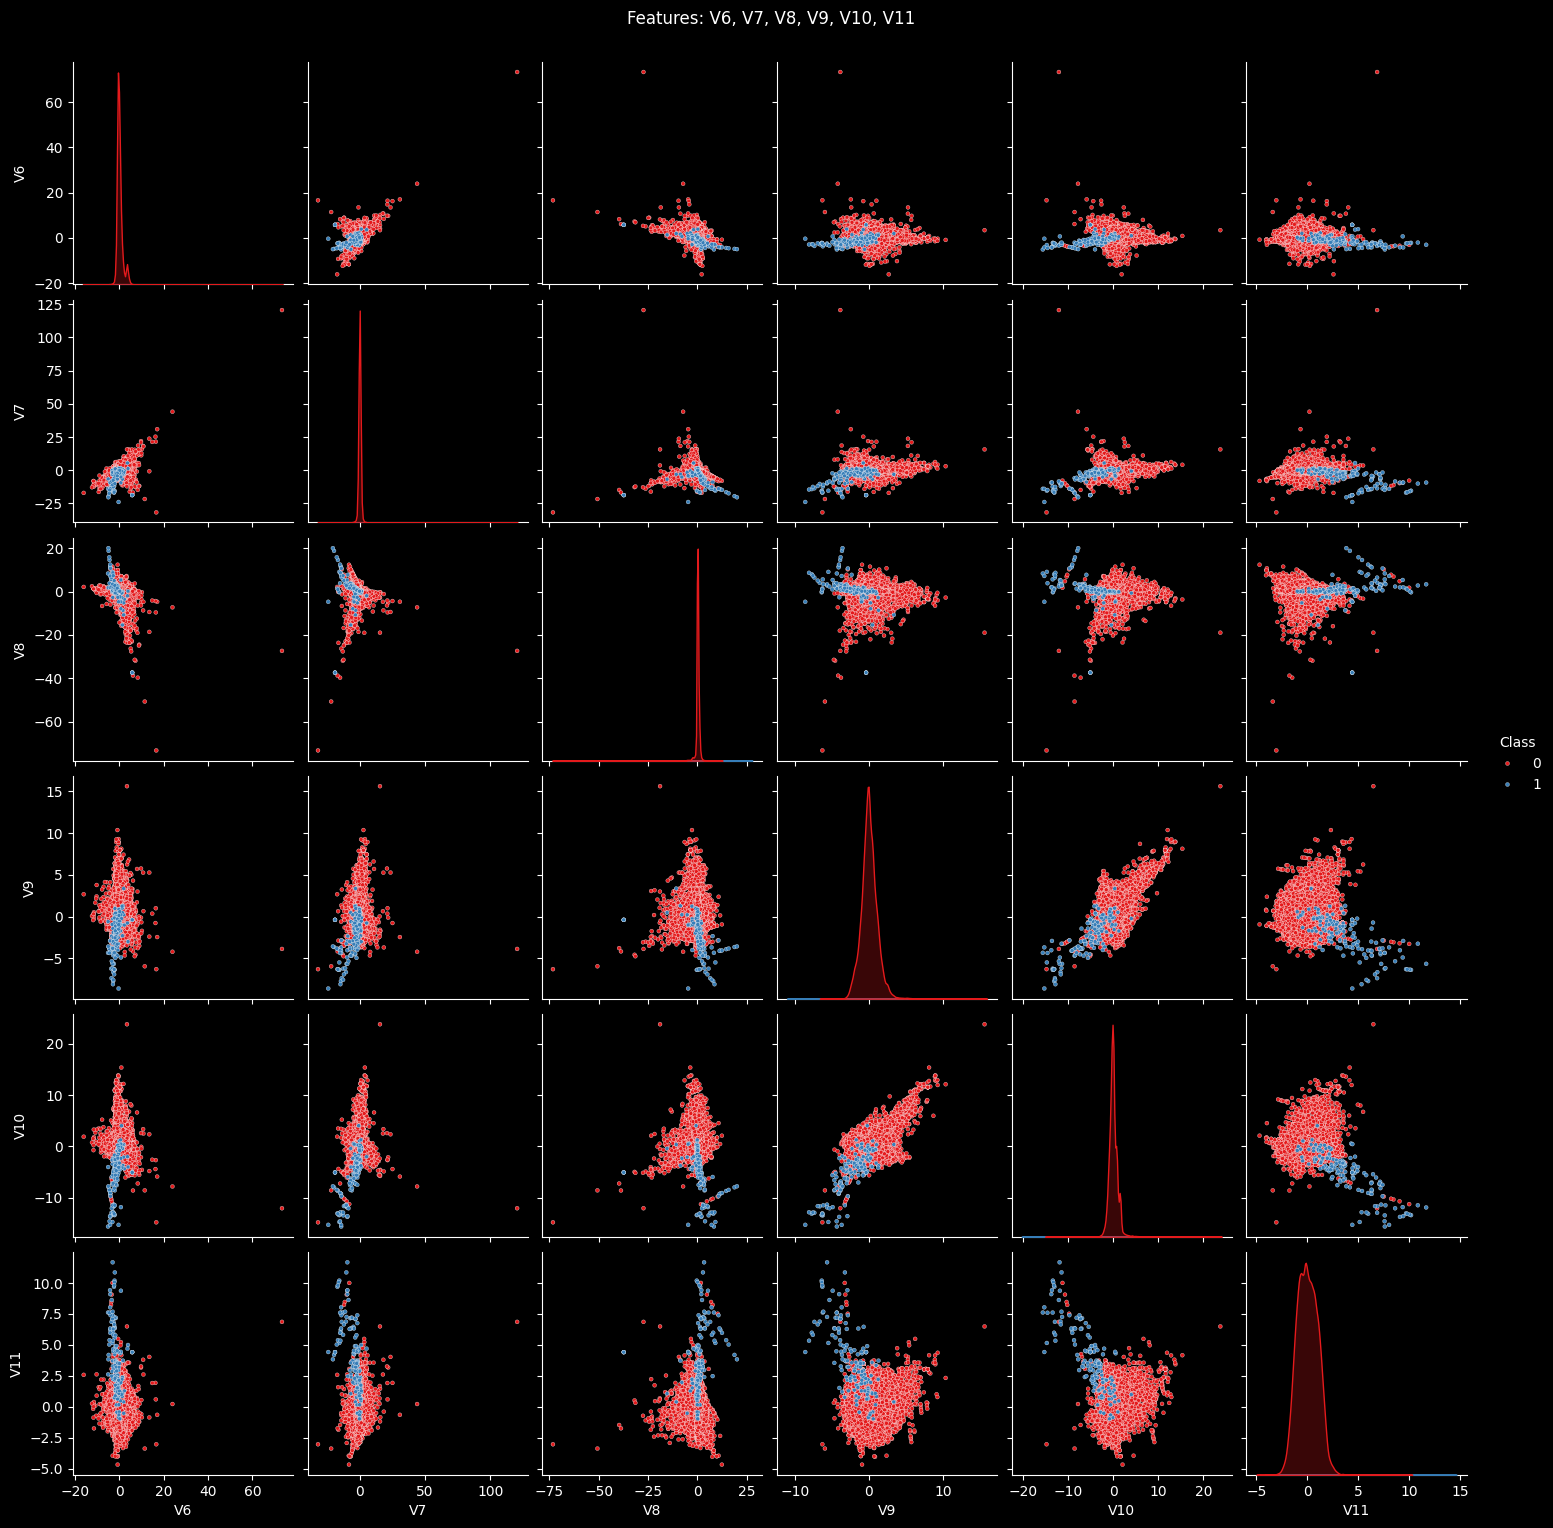

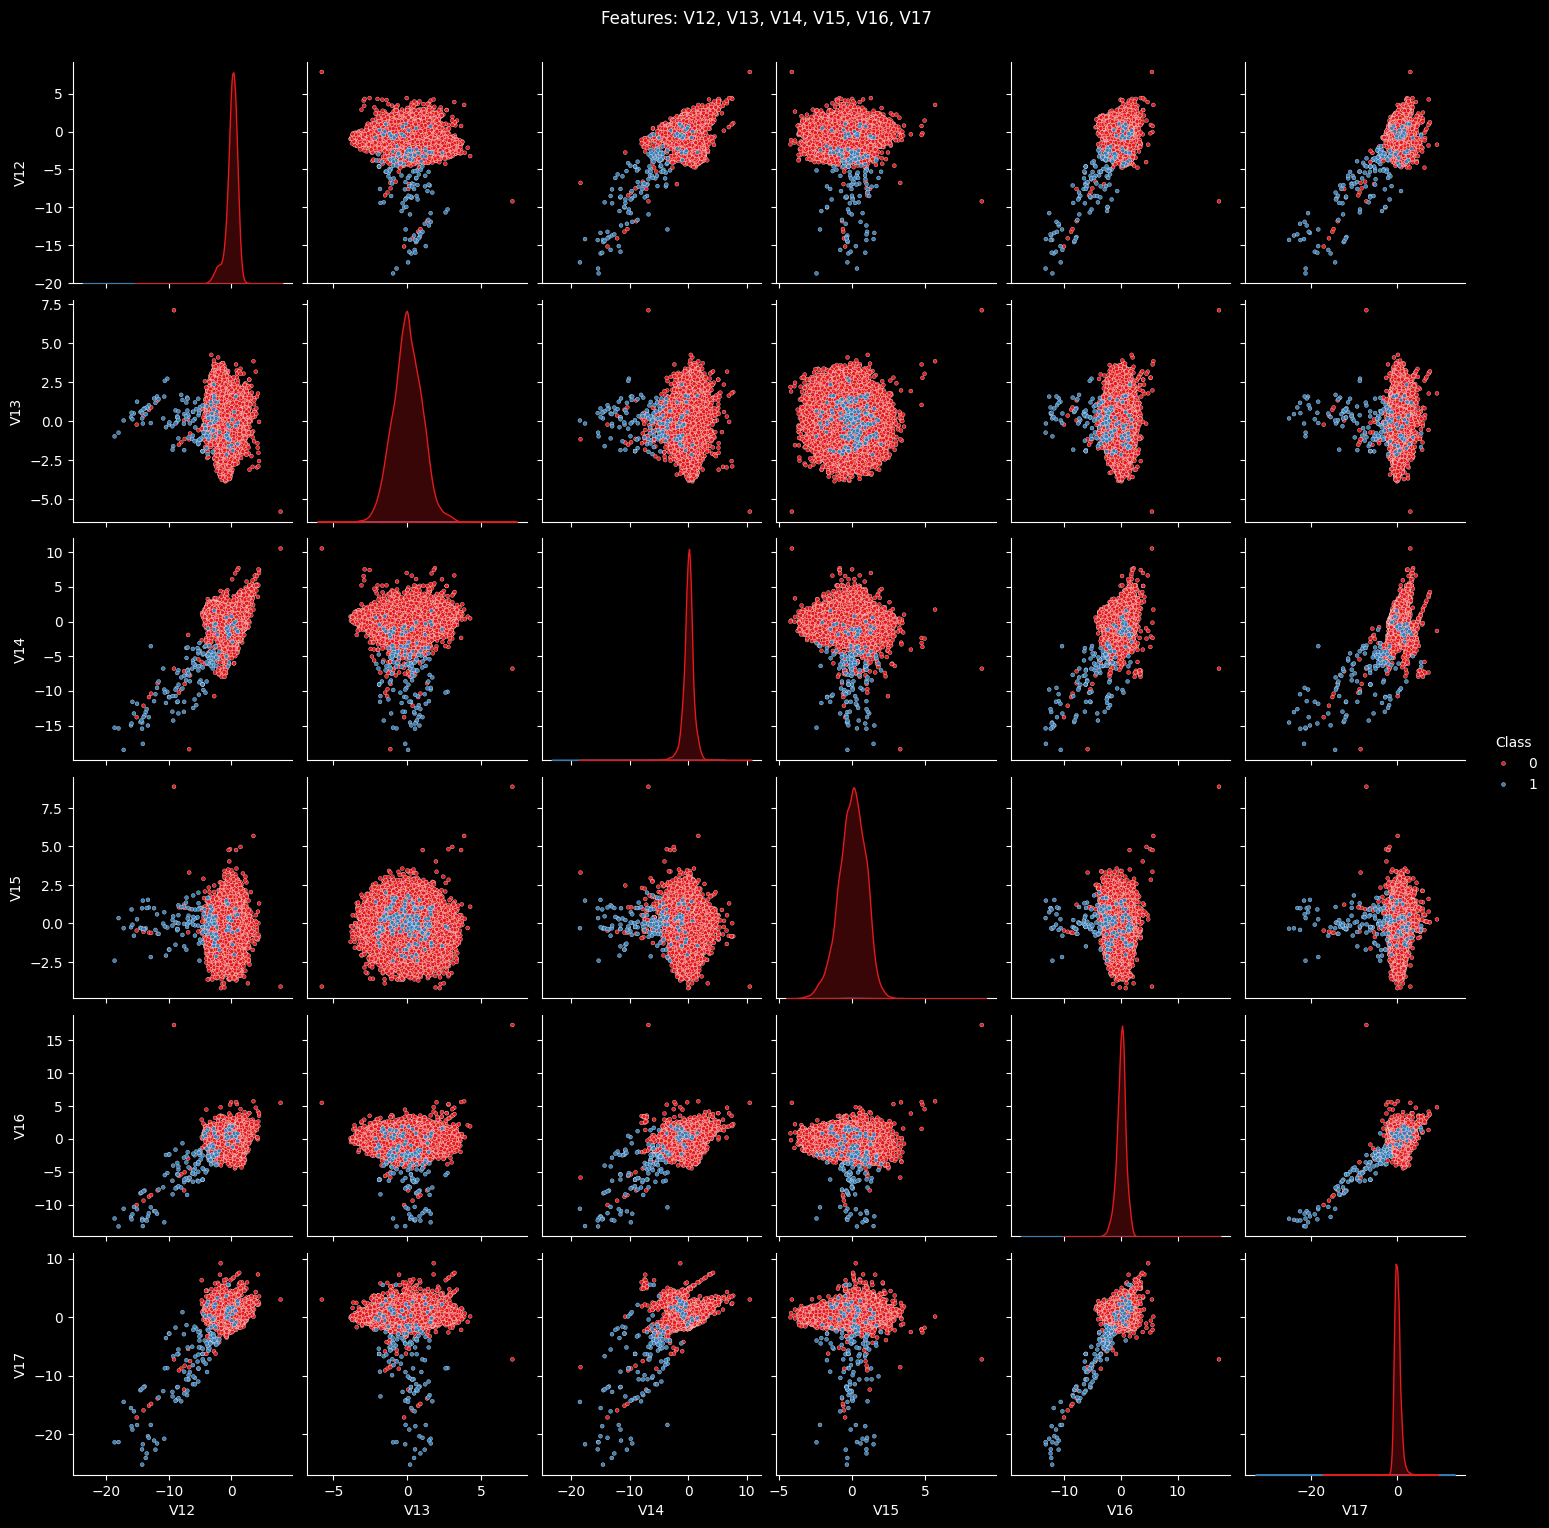

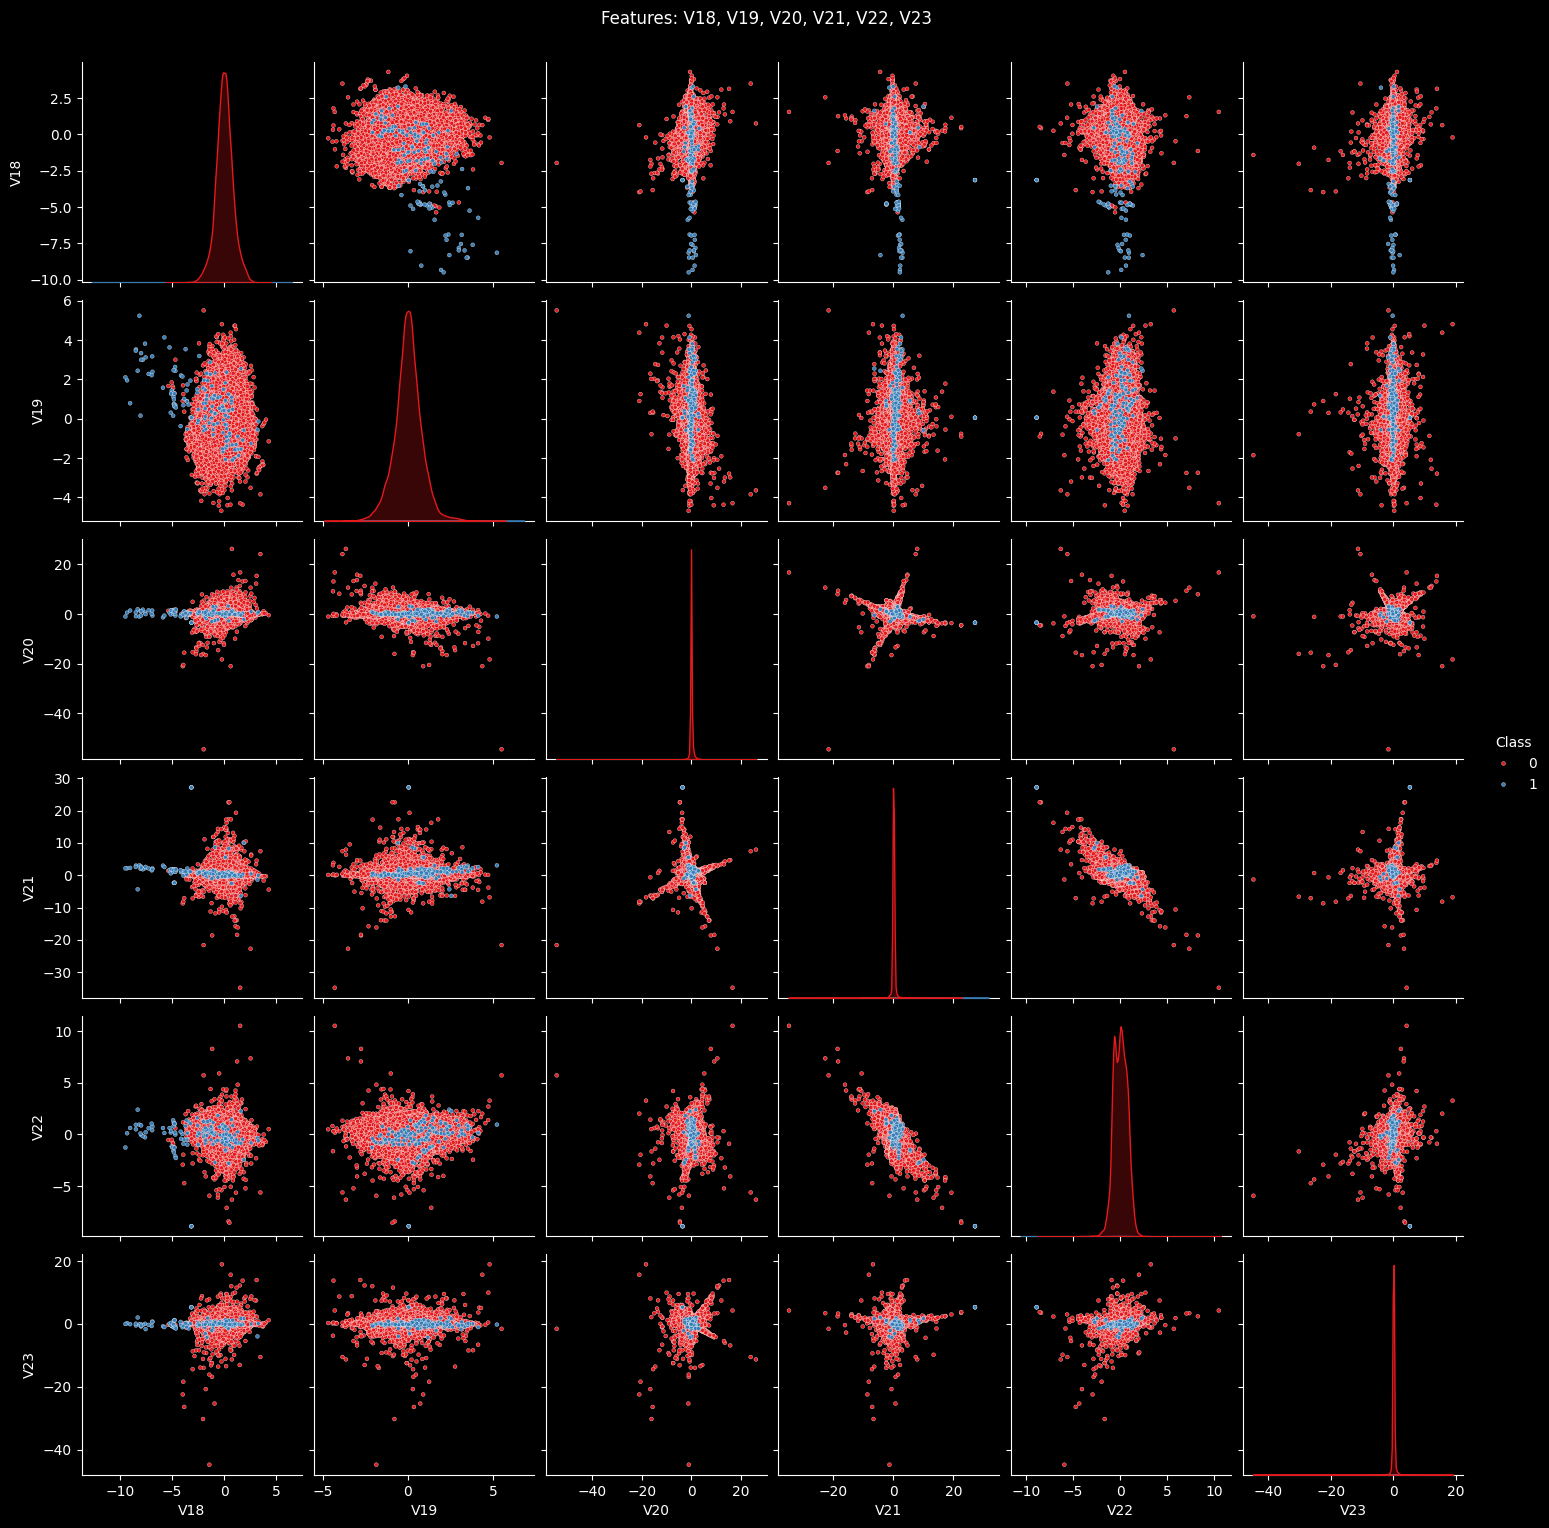

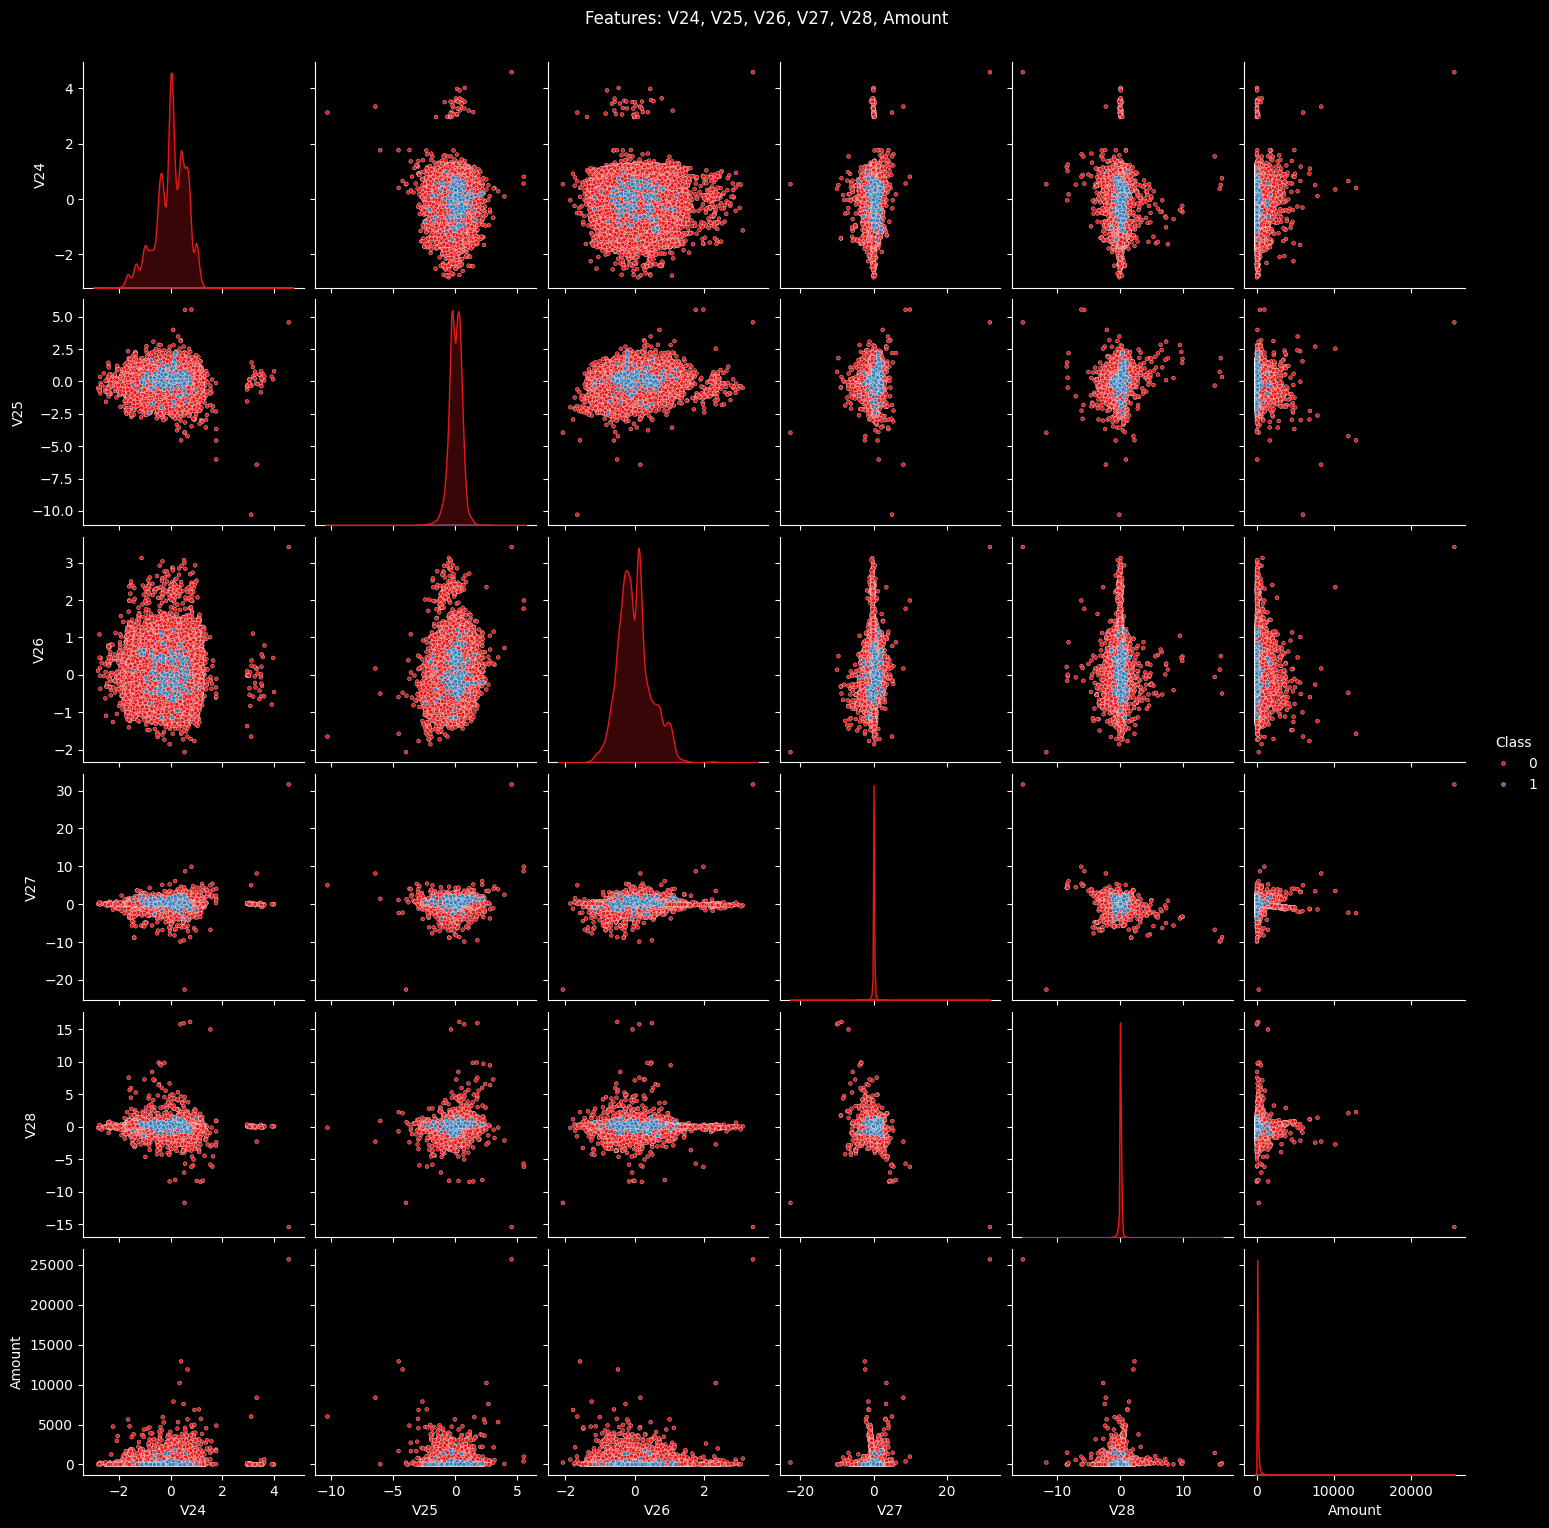

In [30]:
for group in grouped_feats:
    p = sns.pairplot(
        sampled_transactions,
        palette="Set1",
        hue="Class",
        vars=group,
        plot_kws={"alpha": 1, "s": 8},
    )
    p.figure.suptitle(f"Features: {', '.join(group)}", y=1.02)
